<a href="https://colab.research.google.com/github/priyasjsu/Deep-Learning-models/blob/main/CNN_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Applied the CNN models on the Fashion Mnist Dataset. Train the model with the training data and evaluate the model with the test data.

#### CNN model from scratch: Developing a CNN model with 5 convolutional layers (with kernel size= 3
#### stride =1
#### padding = “same”
#### activation function = “relu”)
#### with following MaxPooling layer (Size= 2) and 
#### 3 fully connected layer (including one output layer).
#### After each of the Convolutional layer apply Batch
#### Normalization. In the fully connected layer apply dropout (rate 0.50)

## CNN model from scratch

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import fashion_mnist

# Load the data
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Normalize pixel values to be between 0 and 1
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Add a channel dimension (necessary for convolutional layers)
x_train = x_train[..., tf.newaxis]
x_test = x_test[..., tf.newaxis]

# Convert labels to one-hot encoding
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

# Define the model
model = Sequential([
    Conv2D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu', input_shape=(28, 28, 1)),
    BatchNormalization(),
    Conv2D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=2),
    Conv2D(filters=64, kernel_size=3, strides=1, padding='same', activation='relu'),
    BatchNormalization(),
    Conv2D(filters=64, kernel_size=3, strides=1, padding='same', activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=2),
    Conv2D(filters=128, kernel_size=3, strides=1, padding='same', activation='relu'),
    BatchNormalization(),
    Flatten(),
    Dropout(rate=0.5),
    Dense(units=128, activation='relu'),
    Dropout(rate=0.5),
    Dense(units=64, activation='relu'),
    Dropout(rate=0.5),
    Dense(units=10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, batch_size=128, epochs=20, validation_data=(x_test, y_test))

Epoch 1/20
469/469 [==============================] - 12s 15ms/step - loss: 0.8420 - accuracy: 0.7145 - val_loss: 0.6682 - val_accuracy: 0.7383
Epoch 2/20
469/469 [==============================] - 7s 14ms/step - loss: 0.4855 - accuracy: 0.8355 - val_loss: 0.3688 - val_accuracy: 0.8691
Epoch 3/20
469/469 [==============================] - 6s 13ms/step - loss: 0.3965 - accuracy: 0.8681 - val_loss: 0.2926 - val_accuracy: 0.9000
Epoch 4/20
469/469 [==============================] - 7s 14ms/step - loss: 0.3557 - accuracy: 0.8828 - val_loss: 0.3226 - val_accuracy: 0.8837
Epoch 5/20
469/469 [==============================] - 6s 14ms/step - loss: 0.3255 - accuracy: 0.8928 - val_loss: 0.2540 - val_accuracy: 0.9068
Epoch 6/20
469/469 [==============================] - 7s 15ms/step - loss: 0.2982 - accuracy: 0.8996 - val_loss: 0.2577 - val_accuracy: 0.9117
Epoch 7/20
469/469 [==============================] - 6s 13ms/step - loss: 0.2801 - accuracy: 0.9067 - val_loss: 0.2500 - val_accuracy: 0.912

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 batch_normalization_9 (Batc  (None, 28, 28, 32)       128       
 hNormalization)                                                 
                                                                 
 conv2d_10 (Conv2D)          (None, 28, 28, 32)        9248      
                                                                 
 batch_normalization_10 (Bat  (None, 28, 28, 32)       128       
 chNormalization)                                                
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                        

### Data Augmentation: Applying two image augmentation techniques on the Fashion Mnist train data to augment it and then applying the previously developed model on it.

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load the data
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Normalize pixel values to be between 0 and 1
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Add a channel dimension (necessary for convolutional layers)
x_train = x_train[..., tf.newaxis]
x_test = x_test[..., tf.newaxis]

# Convert labels to one-hot encoding
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

# Define the model
model = Sequential([
    Conv2D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu', input_shape=(28, 28, 1)),
    BatchNormalization(),
    Conv2D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=2),
    Conv2D(filters=64, kernel_size=3, strides=1, padding='same', activation='relu'),
    BatchNormalization(),
    Conv2D(filters=64, kernel_size=3, strides=1, padding='same', activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=2),
    Conv2D(filters=128, kernel_size=3, strides=1, padding='same', activation='relu'),
    BatchNormalization(),
    Flatten(),
    Dropout(rate=0.5),
    Dense(units=128, activation='relu'),
    Dropout(rate=0.5),
    Dense(units=64, activation='relu'),
    Dropout(rate=0.5),
    Dense(units=10, activation='softmax')
])

# Define the data augmentation techniques #rotation and horizontal_flip
datagen = ImageDataGenerator(
    rotation_range=20,
    horizontal_flip=True,
)

# Fit the data generator on the training data
datagen.fit(x_train)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, batch_size=128, epochs=20, validation_data=(x_test, y_test))

Epoch 1/20
469/469 [==============================] - 11s 14ms/step - loss: 0.8636 - accuracy: 0.7103 - val_loss: 0.6049 - val_accuracy: 0.7496
Epoch 2/20
469/469 [==============================] - 6s 13ms/step - loss: 0.4851 - accuracy: 0.8360 - val_loss: 0.3300 - val_accuracy: 0.8872
Epoch 3/20
469/469 [==============================] - 7s 14ms/step - loss: 0.4007 - accuracy: 0.8674 - val_loss: 0.2872 - val_accuracy: 0.9031
Epoch 4/20
469/469 [==============================] - 6s 13ms/step - loss: 0.3571 - accuracy: 0.8822 - val_loss: 0.2826 - val_accuracy: 0.9053
Epoch 5/20
469/469 [==============================] - 7s 14ms/step - loss: 0.3309 - accuracy: 0.8902 - val_loss: 0.2892 - val_accuracy: 0.9050
Epoch 6/20
469/469 [==============================] - 6s 12ms/step - loss: 0.3096 - accuracy: 0.8984 - val_loss: 0.2817 - val_accuracy: 0.8978
Epoch 7/20
469/469 [==============================] - 6s 14ms/step - loss: 0.2890 - accuracy: 0.9028 - val_loss: 0.2448 - val_accuracy: 0.913

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 batch_normalization_5 (Batc  (None, 28, 28, 32)       128       
 hNormalization)                                                 
                                                                 
 conv2d_6 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 batch_normalization_6 (Batc  (None, 28, 28, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                      

### Transfer Learning: Loading the VGG-19 model. Drop after the block4 conv1 layer and on top of it add one global average pooling and one final output layer. Keep the base model layers (VGG19) freeze.

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.applications import VGG19
from tensorflow.keras.models import Model
import numpy as np
from tensorflow.keras.preprocessing.image import img_to_array, array_to_img, ImageDataGenerator


# Load the pre-trained VGG-19 model
base_model = VGG19(weights='imagenet', include_top=False)

# Get the output of the block4 conv1 layer
x = base_model.get_layer('block4_conv1').output

# Load the data
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Add a channel dimension (necessary for convolutional layers)
# resize images to 48x48 and add channel as 3
x_train = np.stack((x_train,) * 3, axis=-1)
x_train = np.asarray([img_to_array(array_to_img(im, scale=False).resize((48,48))) for im in x_train])

x_test = np.stack((x_test,) * 3, axis=-1)
x_test = np.asarray([img_to_array(array_to_img(im, scale=False).resize((48,48))) for im in x_test])

# Normalize pixel values to be between 0 and 1
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

print(x_train.shape)
# Convert labels to one-hot encoding
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# Add a global average pooling layer
x = tf.keras.layers.GlobalAveragePooling2D()(x)

# Add a final output layer
num_classes = 10
predictions = tf.keras.layers.Dense(num_classes, activation='softmax')(x)

# Create a new model with the modified architecture
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, batch_size=128, epochs=20, validation_data=(x_test, y_test))


(60000, 48, 48, 3)
Epoch 1/20
469/469 [==============================] - 41s 75ms/step - loss: 2.7366 - accuracy: 0.1045 - val_loss: 2.1861 - val_accuracy: 0.0975
Epoch 2/20
469/469 [==============================] - 35s 74ms/step - loss: 0.9993 - accuracy: 0.6215 - val_loss: 0.6117 - val_accuracy: 0.7730
Epoch 3/20
469/469 [==============================] - 34s 72ms/step - loss: 0.5386 - accuracy: 0.8021 - val_loss: 0.4693 - val_accuracy: 0.8271
Epoch 4/20
469/469 [==============================] - 35s 74ms/step - loss: 0.4287 - accuracy: 0.8440 - val_loss: 0.3875 - val_accuracy: 0.8616
Epoch 5/20
469/469 [==============================] - 35s 74ms/step - loss: 0.3668 - accuracy: 0.8657 - val_loss: 0.4093 - val_accuracy: 0.8437
Epoch 6/20
469/469 [==============================] - 35s 74ms/step - loss: 0.3264 - accuracy: 0.8814 - val_loss: 0.3218 - val_accuracy: 0.8851
Epoch 7/20
469/469 [==============================] - 34s 72ms/step - loss: 0.2935 - accuracy: 0.8924 - val_loss: 0.3

In [ ]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0   

Making a comparison table including the above three models’ performance on the test data (accuracy), number of trainable parameters and the execution time in minutes.

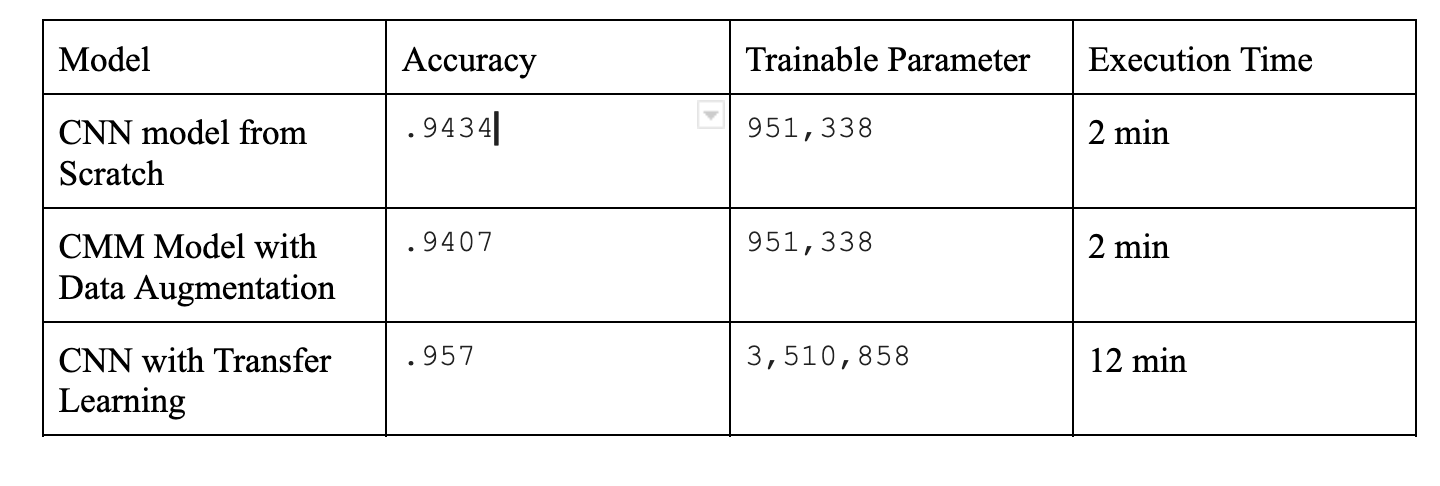

### Apply a residual network specified in the following architecture. All convolutional layers use
### kernel size 3, stride = 1, and padding = “same”,
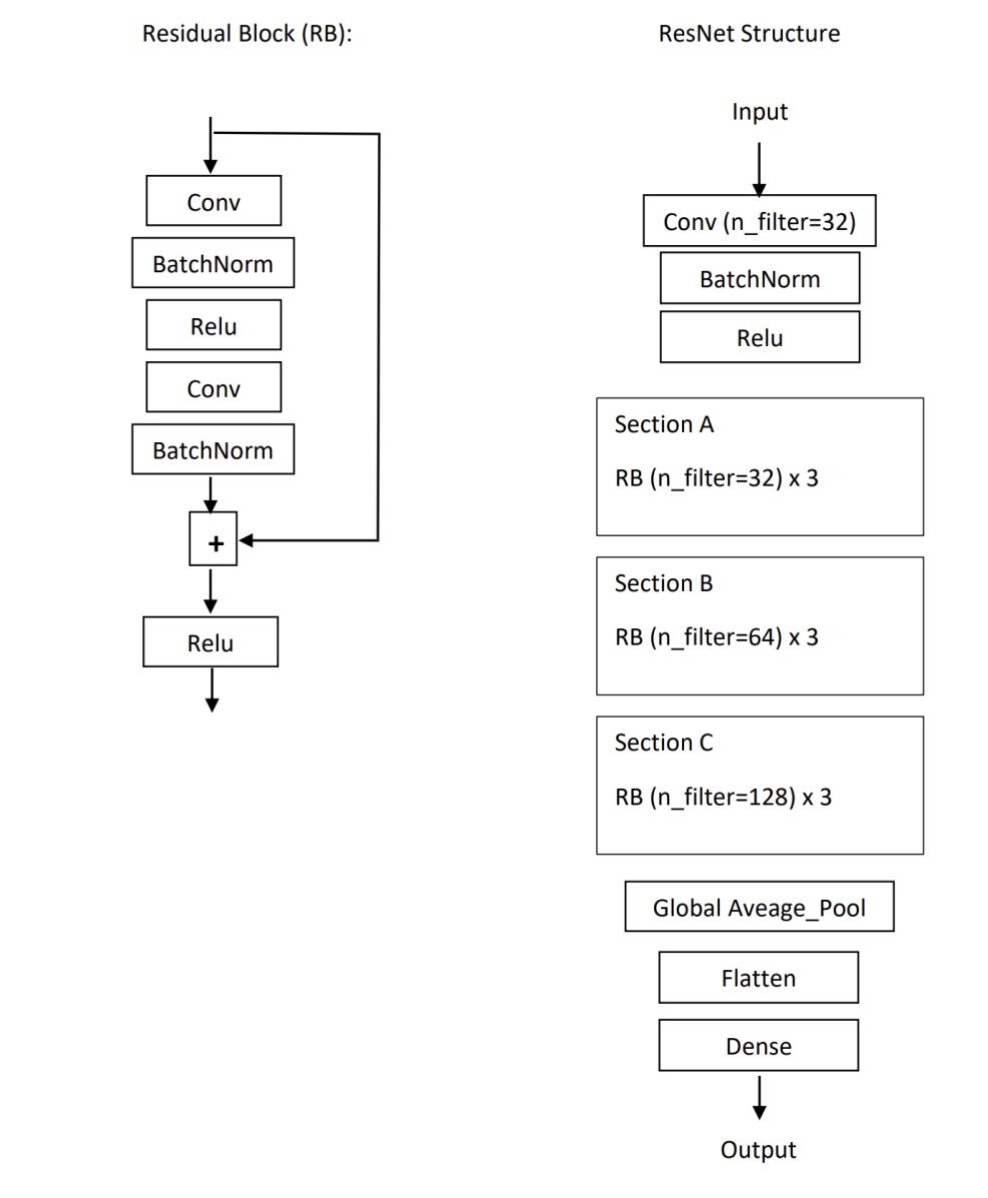

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
from tensorflow.keras import layers

#load the cifar data 
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

num_classes = 10

x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)


#This implementation defines a function residual_block() that takes as input a tensor x, the number of filters 
# and an optional downsample argument that specifies whether to downsample the spatial dimensions of the input. 
#implements a residual block with two convolutional layers and a shortcut connection.
def residual_block(x, filters, downsample=False):
    residual = x
    stride = 1
    if downsample:
        stride = 2
        residual = layers.Conv2D(filters, 1, strides=stride, padding='same')(residual)
        residual = layers.BatchNormalization()(residual)
    
    x = layers.Conv2D(filters, 3, strides=stride, padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)
    
    x = layers.Conv2D(filters, 3, padding='same')(x)
    x = layers.BatchNormalization()(x)
    
    x = layers.add([x, residual])
    x = layers.ReLU()(x)
    
    return x

inputs = layers.Input(shape=(32, 32, 3))

x = layers.Conv2D(32, 3, padding='same')(inputs)
x = layers.BatchNormalization()(x)
x = layers.ReLU()(x)

#calling residual block func. with 32 size where downsample is false because input size is 32
x = residual_block(x, 32)

#calling residual block func. with 64 size where downsample is true because input size is 32
x = residual_block(x, 64, downsample=True)

#calling residual block func. with 128 size where downsample is true because input size is 32
x = residual_block(x, 128, downsample=True)

#at the end added Global average pooling, flatten, dense layer to get the output. 
x = layers.GlobalAveragePooling2D()(x)
x = layers.Flatten()(x)
outputs = layers.Dense(num_classes, activation='softmax')(x)

model = tf.keras.Model(inputs, outputs)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=20, batch_size=64, validation_data=(x_test, y_test))

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)


170498071/170498071 [==============================] - 6s 0us/step
Epoch 1/20
782/782 [==============================] - 30s 18ms/step - loss: 1.2873 - accuracy: 0.5359 - val_loss: 1.6485 - val_accuracy: 0.4552
Epoch 2/20
782/782 [==============================] - 13s 17ms/step - loss: 0.9097 - accuracy: 0.6797 - val_loss: 1.3634 - val_accuracy: 0.5426
Epoch 3/20
782/782 [==============================] - 13s 16ms/step - loss: 0.7568 - accuracy: 0.7345 - val_loss: 1.5209 - val_accuracy: 0.5535
Epoch 4/20
782/782 [==============================] - 13s 16ms/step - loss: 0.6492 - accuracy: 0.7738 - val_loss: 1.1773 - val_accuracy: 0.6097
Epoch 5/20
782/782 [==============================] - 13s 16ms/step - loss: 0.5713 - accuracy: 0.8002 - val_loss: 1.5990 - val_accuracy: 0.5798
Epoch 6/20
782/782 [==============================] - 13s 17ms/step - loss: 0.4969 - accuracy: 0.8273 - val_loss: 1.2168 - val_accuracy: 0.6255
Epoch 7/20
782/782 [==============================] - 13s 17ms/step -

In [ ]:
# model.save('my_model.h5') 